<a href="https://colab.research.google.com/github/sandesh0202/Data-Analysis-Tweet/blob/main/Russia_vs_Ukraine_Tweeter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from textblob import TextBlob

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
#stemmer - it maps different forms of word to one form "stem"
stemmer = nltk.SnowballStemmer("english")
#stopwords - stopwords are common words that are to be ignored
stopword=set(stopwords.words('english'))

In [77]:
from google.colab import files
uploaded = files.upload()

Saving filename.csv to filename (1).csv


In [78]:
import io
data = pd.read_csv(io.BytesIO(uploaded['filename.csv']))

In [79]:
#Cleaning - Removing symbols, urls, and cleaning text as only pure words
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [80]:
data = data[["date", "username", "tweet", "language"]]

In [81]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
#getting sentiment of tweets with polarity scores
sentiments = SentimentIntensityAnalyzer()
data['positive'] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data['negative'] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data['neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]

data_sen = data[["tweet", "positive", "negative", "neutral"]]
data_sen.head(5)

,tweet,positive,negative,neutral
0,artyomlukin sweet assum flight privileg white ...,0.108,0.140,0.753
1,oulosp us perfect capabl betray greek betray a...,0.154,0.349,0.498
2,putin russian nuclear weapon equal world kno...,0.000,0.305,0.695
3,russianembassi mfarussia nato ambasadarusij m...,0.035,0.061,0.904
4,tassagencyen dare see russia wipe,0.000,0.000,1.000


In [83]:
data['score'] = data['tweet'].apply(lambda x: (TextBlob(x).sentiment.polarity))
data

,date,username,tweet,language,positive,negative,neutral,score
0,2022-12-04,1395gual,artyomlukin sweet assum flight privileg white ...,en,0.108,0.140,0.753,0.070000
1,2022-12-04,bharatdharma7,oulosp us perfect capabl betray greek betray a...,en,0.154,0.349,0.498,0.500000
2,2022-12-04,papah_51,putin russian nuclear weapon equal world kno...,en,0.000,0.305,0.695,0.095238
3,2022-12-04,rickymi71279493,russianembassi mfarussia nato ambasadarusij m...,en,0.035,0.061,0.904,0.000000
4,2022-12-04,turkishcrusader,tassagencyen dare see russia wipe,en,0.000,0.000,1.000,0.000000
...,...,...,...,...,...,...,...,...
10001,2022-12-03,smarteconomy,“i must tell ivan fool would good thing sell p...,en,0.167,0.101,0.732,0.366667
10002,2022-12-03,marianobarcelin,hahahahahahaha russia collus,it,0.000,0.000,1.000,0.000000
10003,2022-12-03,adamjam99,originalezbz axio understand money donat ukrai...,en,0.095,0.168,0.737,0.000000
10004,2022-12-03,smarteconomy,european russia europ ensur central govern eff...,en,0.225,0.000,0.775,0.040000


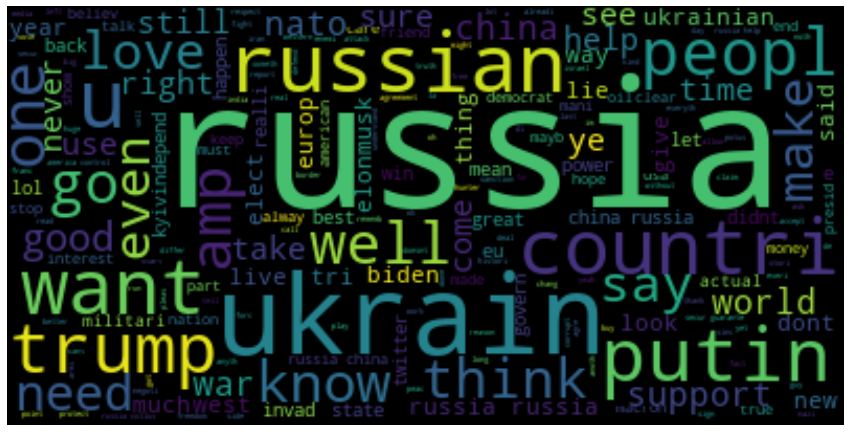

In [84]:
positives =' '.join([i for i in data['tweet'][data['positive'] > data["negative"]]])
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords, background_color="black").generate(positives)
plt.figure( figsize=(15,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()

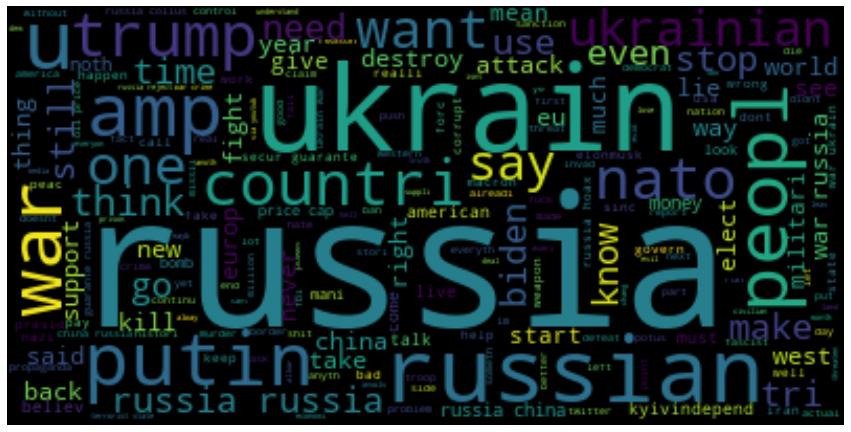

In [85]:
negatives =' '.join([i for i in data['tweet'][data['negative'] > data["positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negatives)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()